In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [2]:
file_location = "C:\\Users\\yunus\\Desktop\\Veri Manipülasyonu\\ARTICLE-INFO\\*"

all_files = glob.glob(file_location)

articles_df = pd.DataFrame()

for file in all_files:
    tables = pd.read_excel(file)
    articles_df = pd.concat([articles_df, tables])

articles_df.to_csv("C:\\Users\\yunus\\Desktop\\Veri Manipülasyonu\\ARTICLE-INFO\\articles_df.csv")

In [3]:
articles = pd.read_csv("C:\\Users\\yunus\\Desktop\\Veri Manipülasyonu\\ARTICLE-INFO\\articles_df.csv")

In [4]:
articles.head()

,Unnamed: 0,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID)
0,0,J,"Magalhaes, C; Mendes, J; Vardasca, R",NaN,NaN,NaN,"Magalhaes, Carolina; Mendes, Joaquim; Vardasca...",NaN,NaN,Meta-Analysis and Systematic Review of the App...,...,"Chemistry, Multidisciplinary; Engineering, Mul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000610899200001
1,1,J,"Da Col, G; Del Ben, F; Bulfoni, M; Turetta, M;...",NaN,NaN,NaN,"Da Col, Giacomo; Del Ben, Fabio; Bulfoni, Mich...",NaN,NaN,Image Analysis of Circulating Tumor Cells and ...,...,Oncology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000760844600001
2,2,J,"Lo Gullo, R; Vincenti, K; Saccarelli, CR; Gibb...",NaN,NaN,NaN,"Lo Gullo, Roberto; Vincenti, Kerri; Saccarelli...",NaN,NaN,Diagnostic value of radiomics and machine lear...,...,Oncology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000609045800002
3,3,J,"Mikdadi, D; O'Connell, KA; Meacham, PJ; Dugan,...",NaN,NaN,NaN,"Mikdadi, Dina; O'Connell, Kyle A.; Meacham, Ph...",NaN,NaN,Applications of artificial intelligence (AI) i...,...,Oncology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000782370800002
4,4,J,"Frankel, AO; Lathara, M; Shaw, CY; Wogmon, O; ...",NaN,NaN,NaN,"Frankel, Arthur O.; Lathara, Melvin; Shaw, Cel...",NaN,NaN,Machine learning for rhabdomyosarcoma histopat...,...,Pathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-17,WOS:000784613100001


In [5]:
articles.columns

Index(['Unnamed: 0', 'Publication Type', 'Authors', 'Book Authors',
       'Book Editors', 'Book Group Authors', 'Author Full Names',
       'Book Author Full Names', 'Group Authors', 'Article Title',
       'Source Title', 'Book Series Title', 'Book Series Subtitle', 'Language',
       'Document Type', 'Conference Title', 'Conference Date',
       'Conference Location', 'Conference Sponsor', 'Conference Host',
       'Author Keywords', 'Keywords Plus', 'Abstract', 'Addresses',
       'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', '

In [6]:
articles_df = articles[['Publication Type', 'Source Title', 'Abstract', 'Publication Year', 'Document Type', 'WoS Categories', 'Author Keywords', 'Keywords Plus']]

In [7]:
articles_df.head()

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021.0,Review,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...
1,J,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022.0,Article,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021.0,Article,Oncology,Radiomics; Machine learning; High-risk lesions...,NaN
3,J,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022.0,Review,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...
4,J,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,NaN,Article; Early Access,Pathology,NaN,CANCER; SARCOMA


In [8]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Publication Type  7717 non-null   object 
 1   Source Title      7717 non-null   object 
 2   Abstract          7279 non-null   object 
 3   Publication Year  7443 non-null   float64
 4   Document Type     7717 non-null   object 
 5   WoS Categories    7715 non-null   object 
 6   Author Keywords   5816 non-null   object 
 7   Keywords Plus     6327 non-null   object 
dtypes: float64(1), object(7)
memory usage: 482.4+ KB


In [9]:
articles_df.isna().sum()

Publication Type       0
Source Title           0
Abstract             438
Publication Year     274
Document Type          0
WoS Categories         2
Author Keywords     1901
Keywords Plus       1390
dtype: int64

In [10]:
articles_df['Publication Type'].unique()

array(['J', 'C', 'S', 'B'], dtype=object)

In [11]:
articles_df[articles_df['Publication Type'] == 'J']['Source Title'].isna().sum()

0

In [12]:
articles_df[articles_df['Publication Type'] == 'C']['Source Title'].isna().sum()

0

In [13]:
articles_df[articles_df['Publication Type'] == 'S']['Source Title'].isna().sum()

0

In [14]:
articles_df[articles_df['Publication Type'] == 'B']['Source Title'].isna().sum()

0

In [15]:
articles_df[articles_df['Author Keywords'].isna() == True]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus
4,J,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,NaN,Article; Early Access,Pathology,NaN,CANCER; SARCOMA
14,J,JCO CLINICAL CANCER INFORMATICS,PURPOSE For patients with early-stage breast c...,2020.0,Article,Oncology,NaN,NaN
17,J,CURRENT SCIENCE,"In recent years, breast cancer is recognized a...",2020.0,News Item,Multidisciplinary Sciences,NaN,ANFIS; SELECTION; HYBRID
19,J,COMPUTATIONAL INTELLIGENCE AND NEUROSCIENCE,Early diagnosis of breast cancer is an importa...,2022.0,Article,Mathematical & Computational Biology; Neurosci...,NaN,FEATURE-EXTRACTION; CLASSIFICATION; OPTIMIZATI...
22,C,TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND TH...,Machine learning models can detect colorectal ...,2021.0,Proceedings Paper,"Engineering, Biomedical; Optics; Imaging Scien...",NaN,NaN
...,...,...,...,...,...,...,...,...
7698,J,SCIENTIFIC REPORTS,To explore the predictive performance of machi...,2021.0,Article,Multidisciplinary Sciences,NaN,BODY-MASS INDEX; IMPACT; COMPLICATIONS; SURVIVAL
7701,J,SCIENTIFIC REPORTS,Stratification of breast cancer (BC) into mole...,2020.0,Article,Multidisciplinary Sciences,NaN,MOLECULAR PORTRAITS
7703,J,JCO CLINICAL CANCER INFORMATICS,PURPOSE Shapley additive explanation (SHAP) va...,2020.0,Article,Oncology,NaN,MODELS; CARE
7704,J,NATURE GENETICS,MOBSTER is an approach for subclonal reconstru...,2020.0,Article,Genetics & Heredity,NaN,EVOLUTIONARY HISTORY; CANCER; MUTATIONS; SELEC...


In [16]:
bos_satırlar = articles_df['Author Keywords'].isna()

articles_df.loc[bos_satırlar, 'Author Keywords'] = articles_df.loc[bos_satırlar, 'WoS Categories']

In [17]:
articles_df['Author Keywords'].isna().sum()

0

In [18]:
articles_df[articles_df['Keywords Plus'].isna() == True]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021.0,Article,Oncology,Radiomics; Machine learning; High-risk lesions...,NaN
5,J,JOURNAL OF CHEMINFORMATICS,The development of selective inhibitors of the...,2021.0,Article,"Chemistry, Multidisciplinary; Computer Science...",Machine learning; Carbonic anhydrase; Selectivity,NaN
10,J,INTERNATIONAL JOURNAL OF HEALTHCARE INFORMATIO...,Lung cancer survival rate is very limited post...,2021.0,Article,Medical Informatics,KNN; MLP; Naive Bayes; NSCLC; SVM; UCI,NaN
11,J,FRONTIERS IN ONCOLOGY,Objective: The aim of this study was to perfor...,2022.0,Review,Oncology,breast cancer; axillary lymph node metastasis;...,NaN
14,J,JCO CLINICAL CANCER INFORMATICS,PURPOSE For patients with early-stage breast c...,2020.0,Article,Oncology,Oncology,NaN
...,...,...,...,...,...,...,...,...
7623,J,JOURNAL OF MEDICAL INTERNET RESEARCH,"Background: During a pandemic, it is important...",2021.0,Article,Health Care Sciences & Services; Medical Infor...,automated machine learning; COVID-19; biomarke...,NaN
7662,J,ALIMENTARY PHARMACOLOGY & THERAPEUTICS,Background The risk of gastric cancer after He...,2021.0,Article,Gastroenterology & Hepatology; Pharmacology & ...,Gastroenterology & Hepatology; Pharmacology & ...,NaN
7680,J,CANCER MANAGEMENT AND RESEARCH,Purpose: This study aimed to establish and eva...,2021.0,Article,Oncology,breast cancer; machine learning; diagnostic ac...,NaN
7687,C,"12TH ACM CONFERENCE ON BIOINFORMATICS, COMPUTA...",This study develops an automated model using t...,2021.0,Proceedings Paper,"Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...",NaN


In [19]:
bos_satırlar2 = articles_df['Keywords Plus'].isna()

articles_df.loc[bos_satırlar2, 'Keywords Plus'] = articles_df.loc[bos_satırlar2, 'Author Keywords']

In [20]:
articles_df['Keywords Plus'].isna().sum()

0

In [21]:
articles_df[articles_df['WoS Categories'].isna() == True]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus
2598,C,IMPROVE: PROCEEDINGS OF THE 2ND INTERNATIONAL ...,This research explores the topic of moles in c...,2022.0,Proceedings Paper,NaN,Melanoma Detection; Machine Learning; Deep Neu...,Melanoma Detection; Machine Learning; Deep Neu...
5318,C,2021 IEEE ASIA-PACIFIC CONFERENCE ON COMPUTER ...,Skin diseases are mostly caused by fungal infe...,2021.0,Proceedings Paper,NaN,Classification; Convolution Neural Network; Cr...,Classification; Convolution Neural Network; Cr...


In [22]:
articles_df['Author Keywords'][2598]

'Melanoma Detection; Machine Learning; Deep Neural Network; Image Processing'

In [23]:
articles_df['Author Keywords'][5318]

'Classification; Convolution Neural Network; Cross Validation; Image segmentation; Skin Cancer Detection; Skin Disease Detection; Machine Learning; Prediction'

In [24]:
articles_df.loc[2598, 'WoS Categories'] = 'Melanoma Detection; Machine Learning; Deep Neural Network; Image Processing'
articles_df.loc[5318, 'WoS Categories'] = 'Classification; Convolution Neural Network; Cross Validation; Image segmentation; Skin Cancer Detection; Skin Disease Detection; Machine Learning; Prediction'

In [25]:
articles_df['WoS Categories'].isna().sum()

0

In [26]:
articles_df[articles_df['Abstract'].isna() == True]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus
109,J,JOURNAL OF GASTROENTEROLOGY AND HEPATOLOGY,NaN,2021.0,Meeting Abstract,Gastroenterology & Hepatology,classification; colorectal cancer; machine lea...,classification; colorectal cancer; machine lea...
127,J,ARQUIVOS BRASILEIROS DE CARDIOLOGIA,NaN,2022.0,Review,Cardiac & Cardiovascular Systems,Machine Learning; Medicine; Cardiology,ARTIFICIAL-INTELLIGENCE; DECISION-SUPPORT; BIG...
228,C,KDD '20: PROCEEDINGS OF THE 26TH ACM SIGKDD IN...,NaN,2020.0,Proceedings Paper,"Computer Science, Artificial Intelligence; Com...",cancer; classification; bioinformatics; screen...,cancer; classification; bioinformatics; screen...
255,J,CANCER DISCOVERY,NaN,2020.0,News Item,Oncology,Oncology,Oncology
263,J,CANCER DISCOVERY,NaN,2021.0,News Item,Oncology,Oncology,Oncology
...,...,...,...,...,...,...,...,...
6685,J,NATURE MEDICINE,NaN,2020.0,Letter,Biochemistry & Molecular Biology; Cell Biology...,Biochemistry & Molecular Biology; Cell Biology...,Biochemistry & Molecular Biology; Cell Biology...
6690,J,INTERNATIONAL JOURNAL OF RADIATION ONCOLOGY BI...,NaN,2020.0,Editorial Material,"Oncology; Radiology, Nuclear Medicine & Medica...","Oncology; Radiology, Nuclear Medicine & Medica...","Oncology; Radiology, Nuclear Medicine & Medica..."
6693,J,BMJ-BRITISH MEDICAL JOURNAL,NaN,2020.0,Article,"Medicine, General & Internal","Medicine, General & Internal",SYSTEM; PREDICTION; STATEMENT; CANCER
6699,J,BMJ-BRITISH MEDICAL JOURNAL,NaN,2020.0,Article,"Medicine, General & Internal","Medicine, General & Internal",RANDOMIZED-TRIALS; SYSTEM; STATEMENT; QUALITY;...


In [27]:
articles_df['Abstract'].replace(np.nan, 'blank', inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3267550467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['Abstract'].replace(np.nan, 'blank', inplace=True)


In [28]:
articles_df['Publication Year'].unique()

array([2021., 2022.,   nan, 2020.])

In [29]:
year_mode = articles_df['Publication Year'].mode()[0]
articles_df['Publication Year'] = articles_df['Publication Year'].fillna(year_mode).astype(int)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\1759848790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['Publication Year'] = articles_df['Publication Year'].fillna(year_mode).astype(int)


In [30]:
articles_df['Publication Year'].unique()

array([2021, 2022, 2020])

In [31]:
articles_df['Publication Year'].isna().sum()

0

In [32]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Publication Type  7717 non-null   object
 1   Source Title      7717 non-null   object
 2   Abstract          7717 non-null   object
 3   Publication Year  7717 non-null   int32 
 4   Document Type     7717 non-null   object
 5   WoS Categories    7717 non-null   object
 6   Author Keywords   7717 non-null   object
 7   Keywords Plus     7717 non-null   object
dtypes: int32(1), object(7)
memory usage: 452.3+ KB


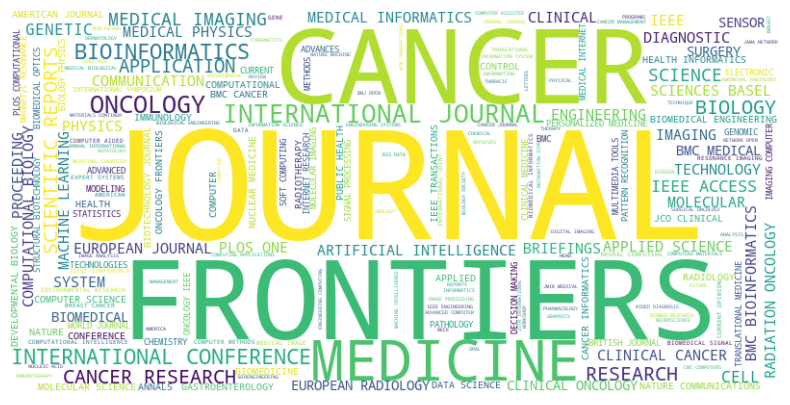

In [33]:
def generate_word_cloud(csv_file, column_name):
    words = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            words.extend(row[column_name].split())

    text = ' '.join(words)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

csv_file = "C:\\Users\\yunus\\Desktop\\Veri Manipülasyonu\\ARTICLE-INFO\\articles_df.csv"
column_name = 'Source Title'

generate_word_cloud(csv_file, column_name)

In [34]:
selected_years = articles.loc[articles['Publication Type'] == 'J', 'Publication Year']

year_counts = selected_years.value_counts()
print(year_counts)

2021.0    3185
2020.0    2235
2022.0    1427
Name: Publication Year, dtype: int64


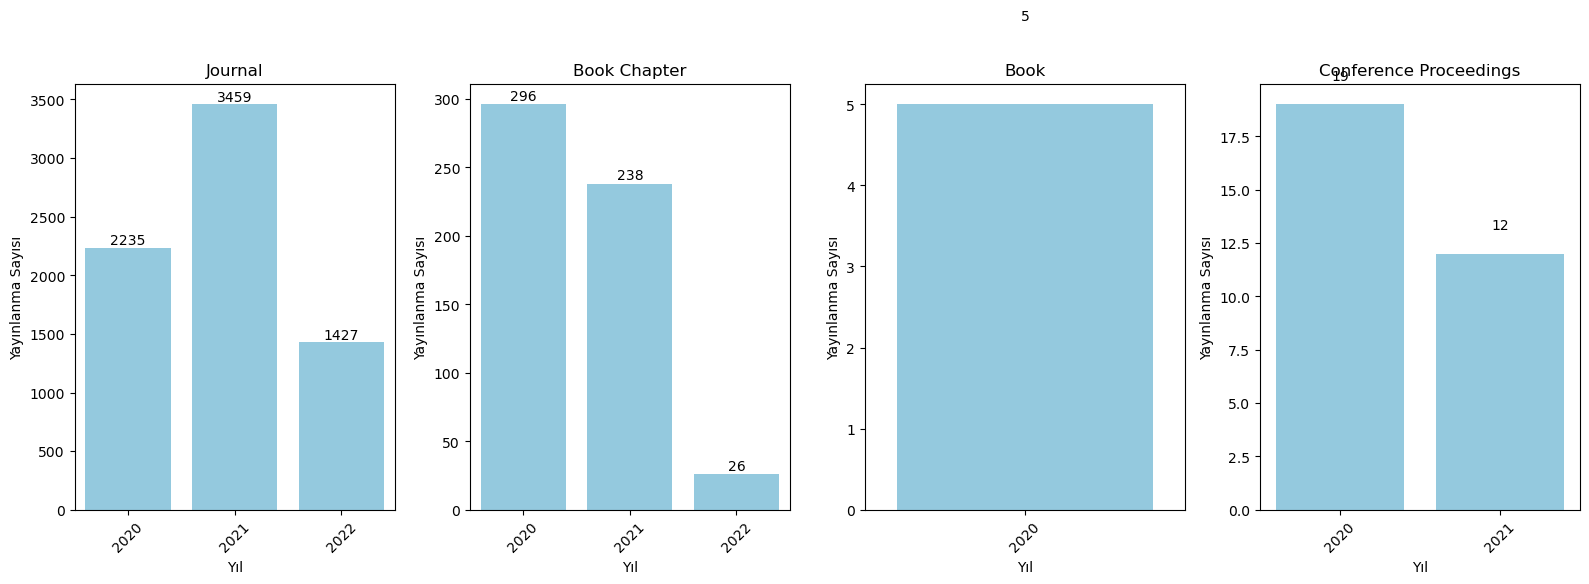

In [35]:
publication_types = ['J', 'C', 'B', 'S']
titles = ['Journal', 'Book Chapter', 'Book', 'Conference Proceedings']

plt.figure(figsize=(16, 6))

for i, pub_type in enumerate(publication_types):
    selected_years = articles_df.loc[articles_df['Publication Type'] == pub_type, 'Publication Year']
    year_counts = selected_years.value_counts().sort_index()
    
    plt.subplot(1, 4, i+1)
    sns.barplot(x=year_counts.index, y=year_counts.values, color='skyblue')
    plt.xlabel('Yıl')
    plt.ylabel('Yayınlanma Sayısı')
    plt.title(titles[i]) 
    plt.xticks(rotation=45)

    for j, count in enumerate(year_counts.values):
        plt.text(j, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [36]:
wos_index = pd.read_csv("C:\\Users\\yunus\\Desktop\\Veri Manipülasyonu\\wos-index.csv")

In [37]:
wos_index.head()

,Title,Title20,Country/Region,SCIE,SSCI,AHCI,ESCI
0,2D MATERIALS,2D MATER,ENGLAND,X,NaN,NaN,NaN
1,3 BIOTECH,3 BIOTECH,GERMANY,X,NaN,NaN,NaN
2,3C EMPRESA,3C EMPRESA,SPAIN,NaN,NaN,NaN,X
3,3C TECNOLOGIA,3C TECNOL,SPAIN,NaN,NaN,NaN,X
4,3C TIC,3C TIC,SPAIN,NaN,NaN,NaN,X


In [38]:
wos_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20942 entries, 0 to 20941
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           20942 non-null  object
 1   Title20         20942 non-null  object
 2   Country/Region  20942 non-null  object
 3   SCIE            9509 non-null   object
 4   SSCI            3511 non-null   object
 5   AHCI            1784 non-null   object
 6   ESCI            7275 non-null   object
dtypes: object(7)
memory usage: 1.1+ MB


In [39]:
wos_index.drop('Title20', axis = 1, inplace = True)

In [40]:
wos_index['SCIE'] = wos_index['SCIE'].fillna('-')

In [41]:
wos_index['SSCI'] = wos_index['SSCI'].fillna('-')

In [42]:
wos_index['AHCI'] = wos_index['AHCI'].fillna('-')

In [43]:
wos_index['ESCI'] = wos_index['ESCI'].fillna('-')

In [44]:
wos_index.sample(10)

,Title,Country/Region,SCIE,SSCI,AHCI,ESCI
3179,CAMERA OBSCURA,UNITED STATES,-,-,X,-
18137,REVISTA ROMANA DE MEDICINA DE LABORATOR,ROMANIA,X,-,-,-
18031,REVISTA GENERO & DIREITO,BRAZIL,-,-,-,X
17420,REFLECTIVE PRACTICE,ENGLAND,-,-,-,X
1558,APPLIED GEOGRAPHY,ENGLAND,-,X,-,-
20590,WASTE MANAGEMENT & RESEARCH,ENGLAND,X,-,-,-
221,ACTA GEOPHYSICA,POLAND,X,-,-,-
20319,UNIVERSITY OF PITTSBURGH LAW REVIEW,UNITED STATES,-,X,-,-
14837,MOLECULAR CANCER,ENGLAND,X,-,-,-
11133,JOURNAL OF EDUCATIONAL RESEARCH,UNITED STATES,-,X,-,-


Sunumda aynı satırda iki adet 'X' var ise bunları toplayıp Score sütununa ekliyordum. Bunu değiştirerek, eğer aynı satırda birden fazla 'X' var ise sadece bir tanesini alması için iç içe if kullandım.

In [45]:
wos_index['Score'] = 0

for index, row in wos_index.iterrows():
    score = 0
    x_count = 0
    
    if 'X' in row['SCIE']:
        score += 1
        x_count += 1
    if 'X' in row['SSCI']:
        if x_count == 0:  
            score += 1
            x_count += 1
    if 'X' in row['AHCI']:
        if x_count == 0: 
            score += 1
            x_count += 1
    if 'X' in row['ESCI']:
        if x_count == 0: 
            score += 0.5
            x_count += 1
    
    wos_index.at[index, 'Score'] = score

In [46]:
wos_index.sample(10)

,Title,Country/Region,SCIE,SSCI,AHCI,ESCI,Score
7590,HARVARD JOURNAL OF LAW AND PUBLIC POLICY,UNITED STATES,-,X,-,-,1.0
9502,INTERNATIONAL JOURNAL OF PUBLIC ADMINISTRATION...,UNITED STATES,-,-,-,X,0.5
6937,FORUM MATHEMATICUM,GERMANY,X,-,-,-,1.0
11907,JOURNAL OF LAW MEDICINE & ETHICS,UNITED STATES,X,X,-,-,1.0
8822,INTERNATIONAL JOURNAL OF APPLIED CERAMIC TECHN...,UNITED STATES,X,-,-,-,1.0
7965,HUMAN NATURE-AN INTERDISCIPLINARY BIOSOCIAL PE...,UNITED STATES,-,X,-,-,1.0
10060,JAPANESE JOURNAL OF APPLIED ENTOMOLOGY AND ZOO...,JAPAN,X,-,-,-,1.0
13329,JOURNAL OF TOURISM AND SERVICES,CZECH REPUBLIC,-,-,-,X,0.5
1084,ANAIS DA ACADEMIA BRASILEIRA DE CIENCIAS,BRAZIL,X,-,-,-,1.0
14067,LWT-FOOD SCIENCE AND TECHNOLOGY,ENGLAND,X,-,-,-,1.0


In [47]:
print(wos_index['Country/Region'].unique())
len(wos_index['Country/Region'].unique())

['ENGLAND' 'GERMANY' 'SPAIN' 'UNITED STATES' 'MALAYSIA' 'JAPAN' 'BRAZIL'
 'AUSTRALIA' 'MEXICO' 'FRANCE' 'CANADA' 'COLOMBIA' 'UKRAINE' 'ITALY'
 'RUSSIA' 'HUNGARY' 'CROATIA' 'NORWAY' 'BELGIUM' 'DENMARK' 'NETHERLANDS'
 'POLAND' 'PEOPLES R CHINA' 'VENEZUELA' 'CHILE' 'ARGENTINA' 'TAIWAN'
 'SLOVENIA' 'CZECH REPUBLIC' 'SOUTH AFRICA' 'SWITZERLAND' 'ROMANIA'
 'ESTONIA' 'SERBIA' 'SLOVAKIA' 'BOSNIA & HERCEG' 'SOUTH KOREA' 'SWEDEN'
 'VIETNAM' 'AUSTRIA' 'INDONESIA' 'PORTUGAL' 'TURKEY' 'BULGARIA'
 'COSTA RICA' 'NEW ZEALAND' 'IRAN' 'PAKISTAN' 'INDIA' 'HONG KONG'
 'SINGAPORE' 'SCOTLAND' 'UGANDA' 'NIGERIA' 'IRELAND' 'FINLAND' 'CUBA'
 'URUGUAY' 'EGYPT' 'Ukraine' 'ECUADOR' 'GREECE' 'SAUDI ARABIA'
 'U ARAB EMIRATES' 'THAILAND' 'AZERBAIJAN' 'LATVIA' 'PERU' 'ISRAEL'
 'ARMENIA' 'IRAQ' 'PHILIPPINES' 'LITHUANIA' 'BAHRAIN' 'MACEDONIA'
 'BANGLADESH' 'CYPRUS' 'KOSOVO' 'ETHIOPIA' 'KAZAKHSTAN' 'SRI LANKA'
 'MOLDOVA' 'UZBEKISTAN' 'BYELARUS' 'BELARUS' 'QATAR' 'WALES' 'PARAGUAY'
 'TUNISIA' 'REP OF GEORGIA' 'MONTENEGRO

115

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\4060473093.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_ulke = top_10_ulke.append(diger)


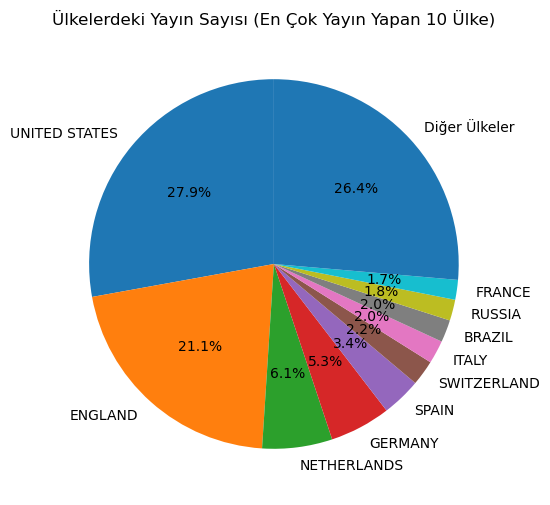

In [48]:
ulkelerdeki_yayinlar = wos_index['Country/Region'].value_counts()

top_10_ulke = ulkelerdeki_yayinlar.head(10)

diger = pd.Series(ulkelerdeki_yayinlar[10:].sum(), index=['Diğer Ülkeler'])
top_10_ulke = top_10_ulke.append(diger)

plt.figure(figsize=(10, 6))
top_10_ulke.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Ülkelerdeki Yayın Sayısı (En Çok Yayın Yapan 10 Ülke)')
plt.ylabel('')
plt.show()

In [49]:
wos_index.loc[:, 'Title'] = wos_index['Title'].str.upper()

In [50]:
wos_index.head()

,Title,Country/Region,SCIE,SSCI,AHCI,ESCI,Score
0,2D MATERIALS,ENGLAND,X,-,-,-,1.0
1,3 BIOTECH,GERMANY,X,-,-,-,1.0
2,3C EMPRESA,SPAIN,-,-,-,X,0.5
3,3C TECNOLOGIA,SPAIN,-,-,-,X,0.5
4,3C TIC,SPAIN,-,-,-,X,0.5


In [51]:
articles_df.loc[:, 'Source Title'] = articles_df['Source Title'].str.upper()

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2131126896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df.loc[:, 'Source Title'] = articles_df['Source Title'].str.upper()


In [52]:
articles_df.head()

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,Review,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...
1,J,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,Article,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,Article,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...
3,J,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,Review,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...
4,J,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,Article; Early Access,Pathology,Pathology,CANCER; SARCOMA


In [53]:
articles_df['Score'] = 0

for index, row in wos_index.iterrows():
    title = row['Title']
    score = row['Score']
    
    articles_df.loc[articles_df['Source Title'] == title, 'Score'] = score

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3884949575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['Score'] = 0
C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3884949575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df.loc[articles_df['Source Title'] == title, 'Score'] = score


In [54]:
articles_df.sample(10)

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score
951,J,PROGRESS IN BIOCHEMISTRY AND BIOPHYSICS,Objective Renal cell carcinoma is a malignant ...,2022,Article,Biochemistry & Molecular Biology; Biophysics,miRNA; renal cell carcinoma; diagnostic biomar...,EXPRESSION; TARGETS; GENES; MICRORNAS; PATHWAY,1.0
4620,J,ENGINEERING SCIENCE AND TECHNOLOGY-AN INTERNAT...,Melanoma is a malignant and aggressive type of...,2021,Article,"Engineering, Multidisciplinary",Classification; Skin lesion clustering; Machin...,DIAGNOSIS; IMAGES,1.0
3665,J,FRONTIERS IN MEDICINE,IntroductionThis study aimed to investigate th...,2022,Article,"Medicine, General & Internal",Multiple Endocrine Neoplasia Type 1; machine l...,TUMORS; GENE,1.0
2982,J,FRONTIERS IN IMMUNOLOGY,PurposeThe hypoxic microenvironment is involve...,2022,Article,Immunology,radiogenomics; computed tomography; ovarian ca...,INFILTRATING IMMUNE CELLS; FEATURES; GENES; TOOL,1.0
7575,J,JOURNAL OF DIGITAL IMAGING,Neuroblastoma is one of the most common pediat...,2022,Article,"Radiology, Nuclear Medicine & Medical Imaging",Neuroblastoma; CT; Radiomics; Machine learning...,MITOSIS-KARYORRHEXIS INDEX; NEURAL-NETWORKS; I...,1.0
4594,J,WORLD JOURNAL OF UROLOGY,blank,2021,Letter,Urology & Nephrology,Radiomics; Kidney cancer; Renal cell carcinoma...,Radiomics; Kidney cancer; Renal cell carcinoma...,1.0
1133,J,CANCERS,Simple Summary Despite the improvements in the...,2022,Article,Oncology,extracellular matrix; ovarian cancer; high-gra...,CLINICAL-SIGNIFICANCE; FAVORABLE PROGNOSIS; LY...,1.0
985,J,JOURNAL OF INTERNAL MEDICINE,Pathology is the cornerstone of cancer care. T...,2020,Review,"Medicine, General & Internal",artificial intelligence; deep learning; digita...,DIGITAL-IMAGE-ANALYSIS; TUMOR-INFILTRATING LYM...,1.0
4462,J,MODERN PATHOLOGY,Although a certain proportion of intramucosal ...,2021,Article,Pathology,Pathology,EXPRESSION PATTERNS; RISK-FACTORS; CARCINOMA; ...,1.0
1118,J,PLOS COMPUTATIONAL BIOLOGY,Author summary Cancer results from mutations i...,2021,Article,Biochemical Research Methods; Mathematical & C...,Biochemical Research Methods; Mathematical & C...,CLONAL EVOLUTION; BREAST; CELL; HETEROGENEITY;...,1.0


In [55]:
len(articles_df[articles_df['Source Title'] == 'EVOLUTIONARY INTELLIGENCE'])

5

In [56]:
wos_index[wos_index['Title'] == 'EVOLUTIONARY INTELLIGENCE']

,Title,Country/Region,SCIE,SSCI,AHCI,ESCI,Score
6544,EVOLUTIONARY INTELLIGENCE,GERMANY,-,-,-,X,0.5


In [57]:
articles_df[articles_df['Source Title'] == 'EVOLUTIONARY INTELLIGENCE']

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score
608,J,EVOLUTIONARY INTELLIGENCE,Background The COVID-19 pandemic has badly aff...,2021,Article; Early Access,"Computer Science, Artificial Intelligence",COVID-19; Machine Learning; Predictive Analysi...,COVID-19; Machine Learning; Predictive Analysi...,0.5
2068,J,EVOLUTIONARY INTELLIGENCE,Histopathological image classification is one ...,2021,Article,"Computer Science, Artificial Intelligence",Convolution neural network; Histopathological ...,BREAST-CANCER DIAGNOSIS,0.5
2344,J,EVOLUTIONARY INTELLIGENCE,Histopathology plays a crucial role in helping...,2021,Article; Early Access,"Computer Science, Artificial Intelligence",Breast cancer; Histopathological images; Trans...,BREAST-CANCER; FRAMEWORK; DATASET; NUCLEI,0.5
5393,J,EVOLUTIONARY INTELLIGENCE,Clustering is a widely used data mining techni...,2021,Article; Early Access,"Computer Science, Artificial Intelligence",Data clustering; Metaheuristics; Unconscious s...,PARTICLE SWARM OPTIMIZATION; K-HARMONIC MEANS;...,0.5
5910,J,EVOLUTIONARY INTELLIGENCE,Identification of the most prominent genes wit...,2021,Article; Early Access,"Computer Science, Artificial Intelligence",Informative genes; High dimensional cancerous ...,EXTREME LEARNING-MACHINE; MICROARRAY DATA; CLA...,0.5


In [58]:
articles_df[articles_df['Score'] == 0]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score
6,C,"BIG-DATA-ANALYTICS IN ASTRONOMY, SCIENCE, AND ...",Substantial body of work has been devoted to s...,2022,Proceedings Paper,"Computer Science, Information Systems; Compute...",Skin cancer; Machine Learning; Deep Neural Net...,CLASSIFICATION,0.0
22,C,TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND TH...,Machine learning models can detect colorectal ...,2021,Proceedings Paper,"Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...",0.0
27,C,ICRSA 2021: 2021 4TH INTERNATIONAL CONFERENCE ...,"Currently, one of the diseases that is causing...",2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Rob...",Human papillomavirus (HPV); Machine learning; ...,Human papillomavirus (HPV); Machine learning; ...,0.0
40,C,2021 INTERNATIONAL JOINT CONFERENCE ON NEURAL ...,Keeping a certain balance of body fat is essen...,2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Com...",Body fat percentage; Machine learning; BF-163 ...,EQUATIONS; ANTHROPOMETRY; PREDICTION; MEN,0.0
53,C,MULTISCALE IMAGING AND SPECTROSCOPY,Cancer cell growth has been shown to affect re...,2020,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Mitochondria; morphology; breast cancer; machi...,IRON,0.0
...,...,...,...,...,...,...,...,...,...
7668,J,FRONTIERS IN ARTIFICIAL INTELLIGENCE,Incidence and mortality rates of endometrial c...,2020,Article,"Computer Science, Artificial Intelligence; Com...",endometrial cancer; cancer screening; early de...,BODY-MASS INDEX; RISK; PREDICTION; METAANALYSI...,0.0
7687,C,"12TH ACM CONFERENCE ON BIOINFORMATICS, COMPUTA...",This study develops an automated model using t...,2021,Proceedings Paper,"Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...",0.0
7697,J,MED,Machine learning is increasingly integrated in...,2021,Review,"Medicine, Research & Experimental","Medicine, Research & Experimental",COMPUTER-AIDED DIAGNOSIS; ARTIFICIAL-INTELLIGE...,0.0
7709,C,MEDICAL IMAGING 2021 - DIGITAL PATHOLOGY,The aim of this study is to incorporate polari...,2021,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Polarized hyperspectral imaging; Stokes vector...,TISSUES; DIAGNOSIS; LIGHT,0.0


In [59]:
articles_df.loc[articles_df['Score'] == 0, 'Score'] = 0.2

In [60]:
articles_df[articles_df['Score'] == 0.2]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score
6,C,"BIG-DATA-ANALYTICS IN ASTRONOMY, SCIENCE, AND ...",Substantial body of work has been devoted to s...,2022,Proceedings Paper,"Computer Science, Information Systems; Compute...",Skin cancer; Machine Learning; Deep Neural Net...,CLASSIFICATION,0.2
22,C,TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND TH...,Machine learning models can detect colorectal ...,2021,Proceedings Paper,"Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...",0.2
27,C,ICRSA 2021: 2021 4TH INTERNATIONAL CONFERENCE ...,"Currently, one of the diseases that is causing...",2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Rob...",Human papillomavirus (HPV); Machine learning; ...,Human papillomavirus (HPV); Machine learning; ...,0.2
40,C,2021 INTERNATIONAL JOINT CONFERENCE ON NEURAL ...,Keeping a certain balance of body fat is essen...,2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Com...",Body fat percentage; Machine learning; BF-163 ...,EQUATIONS; ANTHROPOMETRY; PREDICTION; MEN,0.2
53,C,MULTISCALE IMAGING AND SPECTROSCOPY,Cancer cell growth has been shown to affect re...,2020,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Mitochondria; morphology; breast cancer; machi...,IRON,0.2
...,...,...,...,...,...,...,...,...,...
7668,J,FRONTIERS IN ARTIFICIAL INTELLIGENCE,Incidence and mortality rates of endometrial c...,2020,Article,"Computer Science, Artificial Intelligence; Com...",endometrial cancer; cancer screening; early de...,BODY-MASS INDEX; RISK; PREDICTION; METAANALYSI...,0.2
7687,C,"12TH ACM CONFERENCE ON BIOINFORMATICS, COMPUTA...",This study develops an automated model using t...,2021,Proceedings Paper,"Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...",0.2
7697,J,MED,Machine learning is increasingly integrated in...,2021,Review,"Medicine, Research & Experimental","Medicine, Research & Experimental",COMPUTER-AIDED DIAGNOSIS; ARTIFICIAL-INTELLIGE...,0.2
7709,C,MEDICAL IMAGING 2021 - DIGITAL PATHOLOGY,The aim of this study is to incorporate polari...,2021,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Polarized hyperspectral imaging; Stokes vector...,TISSUES; DIAGNOSIS; LIGHT,0.2


In [61]:
articles_df[articles_df['Score'] == 0]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score


In [62]:
scopus = pd.read_csv("C:\\Users\\yunus\\Desktop\\Veri Manipülasyonu\\scopus_2022_CiteScore.csv")

In [63]:
scopus.head()

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2021),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","56,204",Q1,182,41,121,4006,17959,78,"186,75","97,71",United States,Northern America,Wiley-Blackwell,1950-2021,Hematology (Q1); Oncology (Q1)
1,2,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","33,213",Q1,452,111,338,9025,13797,161,"38,55","81,31",United Kingdom,Western Europe,Nature Publishing Group,2000-2021,Cell Biology (Q1); Molecular Biology (Q1)
2,3,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","31,348",Q1,272,48,111,3406,2241,110,"16,30","70,96",United Kingdom,Western Europe,Oxford University Press,1886-2021,Economics and Econometrics (Q1)
3,4,18434,Cell,journal,"00928674, 10974172","25,716",Q1,814,517,1727,33658,73240,1639,"45,00","65,10",United States,Northern America,Cell Press,1974-2021,"Biochemistry, Genetics and Molecular Biology (..."
4,5,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","25,045",Q1,148,124,17,2900,663,17,"33,79","23,39",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2021,Epidemiology (Q1); Health Information Manageme...


In [64]:
scopus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27339 entries, 0 to 27338
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    27339 non-null  int64 
 1   Sourceid                27339 non-null  int64 
 2   Title                   27339 non-null  object
 3   Type                    27339 non-null  object
 4   Issn                    27339 non-null  object
 5   SJR                     26893 non-null  object
 6   SJR Best Quartile       27339 non-null  object
 7   H index                 27339 non-null  int64 
 8   Total Docs. (2021)      27339 non-null  int64 
 9   Total Docs. (3years)    27339 non-null  int64 
 10  Total Refs.             27339 non-null  int64 
 11  Total Cites (3years)    27339 non-null  int64 
 12  Citable Docs. (3years)  27339 non-null  int64 
 13  Cites / Doc. (2years)   27339 non-null  object
 14  Ref. / Doc.             27339 non-null  object
 15  Co

In [65]:
scopus.corr()

,Rank,Sourceid,H index,Total Docs. (2021),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years)
Rank,1.000000,0.266480,-0.617549,-0.155190,-0.141215,-0.204732,-0.236650,-0.137909
Sourceid,0.266480,1.000000,-0.428642,-0.060528,-0.080644,-0.057544,-0.081748,-0.076162
H index,-0.617549,-0.428642,1.000000,0.291770,0.320911,0.339072,0.536234,0.301061
Total Docs. (2021),-0.155190,-0.060528,0.291770,1.000000,0.899025,0.858998,0.645331,0.893661
Total Docs. (3years),-0.141215,-0.080644,0.320911,0.899025,1.000000,0.743422,0.649039,0.993994
Total Refs.,-0.204732,-0.057544,0.339072,0.858998,0.743422,1.000000,0.771293,0.751107
Total Cites (3years),-0.236650,-0.081748,0.536234,0.645331,0.649039,0.771293,1.000000,0.644479
Citable Docs. (3years),-0.137909,-0.076162,0.301061,0.893661,0.993994,0.751107,0.644479,1.000000


In [66]:
scopus_df = scopus[['Title', 'Type', 'SJR', 'SJR Best Quartile', 'H index', 'Total Cites (3years)']]

In [67]:
scopus_df.head()

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,Ca-A Cancer Journal for Clinicians,journal,"56,204",Q1,182,17959
1,Nature Reviews Molecular Cell Biology,journal,"33,213",Q1,452,13797
2,Quarterly Journal of Economics,journal,"31,348",Q1,272,2241
3,Cell,journal,"25,716",Q1,814,73240
4,MMWR Recommendations and Reports,journal,"25,045",Q1,148,663


In [68]:
scopus_df['SJR Best Quartile'].unique()

array(['Q1', '-', 'Q2', 'Q3', 'Q4'], dtype=object)

In [69]:
score_mapping = {'Q1': 5, 'Q2': 4, 'Q3': 3, 'Q4': 2}
scopus_df['Score'] = scopus_df['SJR Best Quartile'].map(score_mapping)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3481762649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['Score'] = scopus_df['SJR Best Quartile'].map(score_mapping)


In [70]:
scopus_df.sample(10)

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
15847,Croatian Operational Research Review,journal,"0,267",Q3,7,84,3.0
18937,HAYATI Journal of Biosciences,journal,"0,192",Q3,22,78,3.0
12113,Advances in Experimental Medicine and Biology,journal,"0,398",Q3,130,13390,3.0
8123,Journal of Fish Biology,journal,"0,609",Q2,119,1824,4.0
18691,Onomazein,journal,"0,197",Q2,12,27,4.0
2343,Laboratory Investigation,journal,"1,404",Q1,155,2416,5.0
5194,Deep-Sea Research Part I: Oceanographic Resear...,journal,"0,855",Q1,127,1164,5.0
18190,Journal of the Geological Society of Korea,journal,"0,208",Q3,5,67,3.0
14246,Pediatric Neurosurgery,journal,"0,319",Q3,74,183,3.0
9766,Statistics in Biosciences,journal,"0,513",Q2,15,109,4.0


In [71]:
scopus_df['Score'].isna().sum()

610

In [72]:
scopus_df[scopus_df['SJR Best Quartile'] == '-']

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
8,Proceedings of the IEEE International Conferen...,conference and proceedings,"23,032",-,280,23631,NaN
31,Proceedings of the IEEE Computer Society Confe...,conference and proceedings,"13,737",-,408,109427,NaN
287,Digest of Technical Papers - IEEE Internationa...,conference and proceedings,"4,793",-,106,3983,NaN
487,Proceedings of the Annual ACM Symposium on The...,conference and proceedings,"3,376",-,109,1295,NaN
674,Proceedings - IEEE INFOCOM,conference and proceedings,"2,789",-,231,4690,NaN
...,...,...,...,...,...,...,...
27334,WSEAS Transactions on Electronics,journal,NaN,-,10,0,NaN
27335,WSEAS Transactions on Information Science and ...,journal,NaN,-,21,0,NaN
27336,WSEAS Transactions on Systems,journal,NaN,-,27,0,NaN
27337,Z Badan nad Ksiazka i Ksiegozbiorami Historycz...,journal,NaN,-,0,0,NaN


In [73]:
scopus_df[scopus_df['SJR'].isna()]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
26893,Academy of Accounting and Financial Studies Jo...,journal,NaN,-,14,356,NaN
26894,Academy of Entrepreneurship Journal (discontin...,journal,NaN,-,17,232,NaN
26895,Academy of Strategic Management Journal (disco...,journal,NaN,-,21,537,NaN
26896,Accounting (discontinued),journal,NaN,-,10,202,NaN
26897,ACS Agricultural Science and Technology,journal,NaN,-,3,0,NaN
...,...,...,...,...,...,...,...
27334,WSEAS Transactions on Electronics,journal,NaN,-,10,0,NaN
27335,WSEAS Transactions on Information Science and ...,journal,NaN,-,21,0,NaN
27336,WSEAS Transactions on Systems,journal,NaN,-,27,0,NaN
27337,Z Badan nad Ksiazka i Ksiegozbiorami Historycz...,journal,NaN,-,0,0,NaN


In [74]:
scopus_df[scopus_df['H index'] == 0]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
22392,3D Printing in Medicine,journal,"0,130",Q4,0,0,2.0
22420,Brain and Neuroscience Advances,journal,"0,130",Q4,0,0,2.0
22421,Brazilian Neurosurgery,journal,"0,130",Q4,0,0,2.0
22433,Cinemas,journal,"0,130",Q2,0,0,4.0
22437,Clinical Sarcoma Research,journal,"0,130",Q4,0,0,2.0
...,...,...,...,...,...,...,...
27319,USGS Scientific Investigations Report,journal,NaN,-,0,0,NaN
27320,Verba Theologica,journal,NaN,-,0,0,NaN
27324,Virchows Archiv fur pathologische Anatomie und...,journal,NaN,-,0,0,NaN
27328,World Economics,journal,NaN,-,0,0,NaN


In [75]:
scopus_df[scopus_df['Total Cites (3years)'] == 0]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
22392,3D Printing in Medicine,journal,"0,130",Q4,0,0,2.0
22394,ACG Case Reports Journal,journal,"0,130",Q4,4,0,2.0
22404,Africa-Europe Group for Interdisciplinary Studies,book series,"0,130",Q4,11,0,2.0
22408,Annual Review of the Sociology of Religion,book series,"0,130",Q2,10,0,4.0
22409,APA Planning Advisory Service Reports,journal,"0,130",Q4,7,0,2.0
...,...,...,...,...,...,...,...
27334,WSEAS Transactions on Electronics,journal,NaN,-,10,0,NaN
27335,WSEAS Transactions on Information Science and ...,journal,NaN,-,21,0,NaN
27336,WSEAS Transactions on Systems,journal,NaN,-,27,0,NaN
27337,Z Badan nad Ksiazka i Ksiegozbiorami Historycz...,journal,NaN,-,0,0,NaN


In [76]:
print(scopus_df['SJR'].dtypes)
print(scopus_df['H index'].dtypes)
print(scopus_df['Total Cites (3years)'].dtypes)

object
int64
int64


In [77]:
scopus_df['SJR'] = scopus_df['SJR'].str.replace(',', '.')

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\1967210093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['SJR'] = scopus_df['SJR'].str.replace(',', '.')


In [78]:
scopus_df['SJR'] = scopus_df['SJR'].astype('float')

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\1570607269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['SJR'] = scopus_df['SJR'].astype('float')


In [79]:
en_kucuk_deger = scopus_df.loc[scopus_df['SJR'] != 0, 'SJR'].min()
en_kucuk_deger

0.1

In [80]:
scopus_df['SJR'].fillna(0.05, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\1200859549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['SJR'].fillna(0.05, inplace=True)


In [81]:
scopus_df['SJR'].isna().sum()

0

In [82]:
en_kucuk_deger2 = scopus_df.loc[scopus_df['H index'] != 0, 'H index'].min()
en_kucuk_deger2

1

In [83]:
scopus_df['H index'].replace(0, 0.5, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2044735824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['H index'].replace(0, 0.5, inplace=True)


In [84]:
scopus_df[scopus_df['H index'] == 0]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score


In [85]:
en_kucuk_deger3 = scopus_df.loc[scopus_df['Total Cites (3years)'] != 0, 'Total Cites (3years)'].min()
en_kucuk_deger3

1

In [86]:
scopus_df['Total Cites (3years)'].replace(0, 0.5, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3359036995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['Total Cites (3years)'].replace(0, 0.5, inplace=True)


In [87]:
scopus_df[scopus_df['Total Cites (3years)'] == 0]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score


In [88]:
nan_indices = scopus_df['Score'].isnull()
sjr = scopus_df['SJR'] * 0.1
h_index = scopus_df['H index'] * 0.01
total_cites = scopus_df['Total Cites (3years)'] * 0.001
scores = sjr + h_index + total_cites

max_score = scores.max()
min_score = scores.min()
normalized_scores = (scores - min_score) / (max_score - min_score)

scopus_df.loc[nan_indices, 'Score'] = normalized_scores[nan_indices]

In [89]:
scopus_df[scopus_df['SJR Best Quartile'] == '-'].head(10)

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
8,Proceedings of the IEEE International Conferen...,conference and proceedings,23.032,-,280.0,23631.0,0.100817
31,Proceedings of the IEEE Computer Society Confe...,conference and proceedings,13.737,-,408.0,109427.0,0.403181
287,Digest of Technical Papers - IEEE Internationa...,conference and proceedings,4.793,-,106.0,3983.0,0.019346
487,Proceedings of the Annual ACM Symposium on The...,conference and proceedings,3.376,-,109.0,1295.0,0.009519
674,Proceedings - IEEE INFOCOM,conference and proceedings,2.789,-,231.0,4690.0,0.025511
775,Proceedings of the Annual ACM-SIAM Symposium o...,conference and proceedings,2.610,-,100.0,1530.0,0.009759
811,"IEEE Symposium on VLSI Circuits, Digest of Tec...",conference and proceedings,2.537,-,63.0,839.0,0.006010
830,Proceedings of the ACM Conference on Computer ...,conference and proceedings,2.512,-,180.0,4469.0,0.022848
1005,Proceedings of the ACM SIGMOD International Co...,conference and proceedings,2.273,-,166.0,3026.0,0.017208
1019,Proceedings of the Annual ACM Symposium on Pri...,conference and proceedings,2.257,-,73.0,587.0,0.005378


In [90]:
scopus_df[scopus_df['Score'] == 0]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years),Score
26926,Arab Journal of Forensic Sciences and Forensic...,journal,0.05,-,0.5,0.5,0.0
26927,Arteterapia,journal,0.05,-,0.5,0.5,0.0
26933,Asparkia,journal,0.05,-,0.5,0.5,0.0
26939,Biophysical Bulletin,journal,0.05,-,0.5,0.5,0.0
26940,BioProducts Business,journal,0.05,-,0.5,0.5,0.0
...,...,...,...,...,...,...,...
27319,USGS Scientific Investigations Report,journal,0.05,-,0.5,0.5,0.0
27320,Verba Theologica,journal,0.05,-,0.5,0.5,0.0
27324,Virchows Archiv fur pathologische Anatomie und...,journal,0.05,-,0.5,0.5,0.0
27328,World Economics,journal,0.05,-,0.5,0.5,0.0


In [91]:
en_kucuk_deger4 = scopus_df.loc[scopus_df['Score'] != 0, 'Score'].min()
en_kucuk_deger4

1.7549401565406613e-05

In [92]:
deger = 1.7549401565406613e-05
rounded = "{:.6f}".format(deger)
rounded

'0.000018'

In [93]:
scopus_df['Score'].replace(0, 0.000018, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\1386007084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['Score'].replace(0, 0.000018, inplace=True)


In [94]:
scopus_df.drop('SJR Best Quartile', axis = 1, inplace = True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2783201272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df.drop('SJR Best Quartile', axis = 1, inplace = True)


In [95]:
scopus_df = scopus_df.rename(columns={'Score': 'SJR Best Quartile'})

In [96]:
scopus_df = scopus_df[['Title', 'Type', 'SJR', 'SJR Best Quartile', 'H index', 'Total Cites (3years)']]

In [97]:
scopus_df[scopus_df['SJR Best Quartile'] < 1]

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years)
8,Proceedings of the IEEE International Conferen...,conference and proceedings,23.032,0.100817,280.0,23631.0
31,Proceedings of the IEEE Computer Society Confe...,conference and proceedings,13.737,0.403181,408.0,109427.0
287,Digest of Technical Papers - IEEE Internationa...,conference and proceedings,4.793,0.019346,106.0,3983.0
487,Proceedings of the Annual ACM Symposium on The...,conference and proceedings,3.376,0.009519,109.0,1295.0
674,Proceedings - IEEE INFOCOM,conference and proceedings,2.789,0.025511,231.0,4690.0
...,...,...,...,...,...,...
27334,WSEAS Transactions on Electronics,journal,0.050,0.000333,10.0,0.5
27335,WSEAS Transactions on Information Science and ...,journal,0.050,0.000720,21.0,0.5
27336,WSEAS Transactions on Systems,journal,0.050,0.000930,27.0,0.5
27337,Z Badan nad Ksiazka i Ksiegozbiorami Historycz...,journal,0.050,0.000018,0.5,0.5


In [98]:
scopus_df.loc[:, 'Title'] = scopus_df['Title'].str.upper()

In [99]:
scopus_df.head()

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,CA-A CANCER JOURNAL FOR CLINICIANS,journal,56.204,5.0,182.0,17959.0
1,NATURE REVIEWS MOLECULAR CELL BIOLOGY,journal,33.213,5.0,452.0,13797.0
2,QUARTERLY JOURNAL OF ECONOMICS,journal,31.348,5.0,272.0,2241.0
3,CELL,journal,25.716,5.0,814.0,73240.0
4,MMWR RECOMMENDATIONS AND REPORTS,journal,25.045,5.0,148.0,663.0


In [100]:
articles_df['SJR'] = np.nan
articles_df['SJR Best Quartile'] = np.nan
articles_df['H index'] = np.nan
articles_df['Total Cites (3years)'] = np.nan

for index, row in scopus_df.iterrows():
    title = row['Title']
    matching_rows = articles_df[articles_df['Source Title'] == title]
    
    if len(matching_rows) > 0:
        articles_df.loc[matching_rows.index, 'SJR'] = row['SJR']
        articles_df.loc[matching_rows.index, 'SJR Best Quartile'] = row['SJR Best Quartile']
        articles_df.loc[matching_rows.index, 'H index'] = row['H index']
        articles_df.loc[matching_rows.index, 'Total Cites (3years)'] = row['Total Cites (3years)']


C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2921783742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['SJR'] = np.nan
C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2921783742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['SJR Best Quartile'] = np.nan
C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2921783742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [101]:
articles_df

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,Review,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,NaN,NaN,NaN,NaN
1,J,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,Article,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.0,102.0,28630.0
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,Article,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.0,160.0,6060.0
3,J,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,Review,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.0,46.0,1958.0
4,J,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,Article; Early Access,Pathology,Pathology,CANCER; SARCOMA,1.0,2.394,5.0,159.0,5361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,J,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,Article,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.0,99.0,3717.0
7713,J,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,Review,"Computer Science, Artificial Intelligence; Eng...",Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.0,93.0,2790.0
7714,J,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,Review,Biochemistry & Molecular Biology; Biophysics,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.0,69.0,477.0
7715,J,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,Article,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,NaN,NaN,NaN,NaN


In [102]:
merged_df = pd.merge(scopus_df, articles_df, left_on='Title', right_on='Source Title', how='inner')

total_matches = merged_df.shape[0]
duplicated_titles = merged_df['Title'].duplicated().sum()

print(f"Toplam eşleşen başlık sayısı: {total_matches}")
print(f"Birden fazla aynı başlığa sahip eşleşen başlık sayısı: {duplicated_titles}")

Toplam eşleşen başlık sayısı: 6214
Birden fazla aynı başlığa sahip eşleşen başlık sayısı: 4934


In [103]:
merged_df = pd.merge(scopus_df, articles_df, left_on='Title', right_on='Source Title', how='inner')

duplicated_titles = merged_df['Title'].duplicated()
duplicate_titles_df = merged_df[duplicated_titles]['Title'].drop_duplicates()

print("Birden fazla aynı başlığa sahip eşleşen başlık adları:")
print(duplicate_titles_df)

Birden fazla aynı başlığa sahip eşleşen başlık adları:
1                                                    CELL
10                                        NATURE MEDICINE
21                               NATURE REVIEWS MATERIALS
23                                NATURE REVIEWS GENETICS
26                                   NATURE BIOTECHNOLOGY
                              ...                        
6175                                          ELECTRONICS
6191                                        DATA IN BRIEF
6195                  CLINICAL AND TRANSLATIONAL MEDICINE
6202                                             ONKOLOGE
6210    INTERNATIONAL JOURNAL OF INTERACTIVE MULTIMEDI...
Name: Title, Length: 673, dtype: object


In [104]:
scopus_df[scopus_df['Title'] == 'CELL']

,Title,Type,SJR,SJR Best Quartile,H index,Total Cites (3years)
3,CELL,journal,25.716,5.0,814.0,73240.0


In [105]:
articles_df[articles_df['Source Title'] == 'CELL']

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
1138,J,CELL,Although base editors are widely used to insta...,2020,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,DNA GLYCOSYLASE; GENOMIC DNA; HUMAN-CELLS; AID...,1.0,25.716,5.0,814.0,73240.0
3282,J,CELL,Ductal carcinoma in situ (DCIS) is a pre-invas...,2022,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,CARCINOMA IN-SITU; TERM FOLLOW-UP; IMMUNE MICR...,1.0,25.716,5.0,814.0,73240.0
4147,J,CELL,There is an unmet clinical need for improved t...,2020,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,PLASMA-MEMBRANE; EXOSOMES; CELLS; ASSOCIATION;...,1.0,25.716,5.0,814.0,73240.0
4175,J,CELL,Determining how cells vary with their local si...,2021,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,IMMUNE CELLS; T-CELLS; BLOCKADE; STATISTICS; E...,1.0,25.716,5.0,814.0,73240.0
6664,J,CELL,Mouse embryonic development is a canonical mod...,2021,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,EPIBLAST STEM-CELLS; LINEAGE ALLOCATION; RNA-S...,1.0,25.716,5.0,814.0,73240.0
6666,J,CELL,Post-acute sequelae of COVID-19 (PASC) represe...,2022,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,CELL; INFECTION,1.0,25.716,5.0,814.0,73240.0
6681,J,CELL,"The cyclic pyrimidines 3',5'-cyclic cytidine m...",2021,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,MULTIPLE SEQUENCE ALIGNMENT; ADENYLYL CYCLASES...,1.0,25.716,5.0,814.0,73240.0
6709,J,CELL,"We present a global atlas of 4,728 metagenomic...",2021,Article,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,EPIDEMIOLOGY; AGRICULTURE; ENVIRONMENT; PREVAL...,1.0,25.716,5.0,814.0,73240.0
7371,J,CELL,This Perspective explores the application of m...,2020,Review,Biochemistry & Molecular Biology; Cell Biology,Biochemistry & Molecular Biology; Cell Biology,CANCER; HEALTH; PREDICTION; MUTATIONS; ALGORIT...,1.0,25.716,5.0,814.0,73240.0


In [106]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Publication Type      7717 non-null   object 
 1   Source Title          7717 non-null   object 
 2   Abstract              7717 non-null   object 
 3   Publication Year      7717 non-null   int32  
 4   Document Type         7717 non-null   object 
 5   WoS Categories        7717 non-null   object 
 6   Author Keywords       7717 non-null   object 
 7   Keywords Plus         7717 non-null   object 
 8   Score                 7717 non-null   float64
 9   SJR                   6201 non-null   float64
 10  SJR Best Quartile     6201 non-null   float64
 11  H index               6201 non-null   float64
 12  Total Cites (3years)  6201 non-null   float64
dtypes: float64(5), int32(1), object(7)
memory usage: 753.7+ KB


In [107]:
articles_df[articles_df['SJR'].isna()]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,Review,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,NaN,NaN,NaN,NaN
6,C,"BIG-DATA-ANALYTICS IN ASTRONOMY, SCIENCE, AND ...",Substantial body of work has been devoted to s...,2022,Proceedings Paper,"Computer Science, Information Systems; Compute...",Skin cancer; Machine Learning; Deep Neural Net...,CLASSIFICATION,0.2,NaN,NaN,NaN,NaN
16,J,BIOMEDICINE & PHARMACOTHERAPY,Alterations in xanthine oxidase activity are k...,2021,Article,"Medicine, Research & Experimental; Pharmacolog...",Coronary artery disease (CAD); Metabolomics; M...,CARDIOVASCULAR-DISEASE; HEART-DISEASE; URIC-AC...,1.0,NaN,NaN,NaN,NaN
22,C,TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND TH...,Machine learning models can detect colorectal ...,2021,Proceedings Paper,"Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...",0.2,NaN,NaN,NaN,NaN
27,C,ICRSA 2021: 2021 4TH INTERNATIONAL CONFERENCE ...,"Currently, one of the diseases that is causing...",2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Rob...",Human papillomavirus (HPV); Machine learning; ...,Human papillomavirus (HPV); Machine learning; ...,0.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,C,"12TH ACM CONFERENCE ON BIOINFORMATICS, COMPUTA...",This study develops an automated model using t...,2021,Proceedings Paper,"Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...",0.2,NaN,NaN,NaN,NaN
7702,J,CURRENT PROTEIN & PEPTIDE SCIENCE,Peptides act as promising anticancer agents du...,2020,Review,Biochemistry & Molecular Biology,Cancer; anticancer peptides; machine learning;...,SEQUENCE-BASED TOOL; WEB SERVER; COMPUTATIONAL...,1.0,NaN,NaN,NaN,NaN
7709,C,MEDICAL IMAGING 2021 - DIGITAL PATHOLOGY,The aim of this study is to incorporate polari...,2021,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Polarized hyperspectral imaging; Stokes vector...,TISSUES; DIAGNOSIS; LIGHT,0.2,NaN,NaN,NaN,NaN
7715,J,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,Article,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,NaN,NaN,NaN,NaN


In [108]:
articles_df[articles_df['H index'].isna()]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,Review,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,NaN,NaN,NaN,NaN
6,C,"BIG-DATA-ANALYTICS IN ASTRONOMY, SCIENCE, AND ...",Substantial body of work has been devoted to s...,2022,Proceedings Paper,"Computer Science, Information Systems; Compute...",Skin cancer; Machine Learning; Deep Neural Net...,CLASSIFICATION,0.2,NaN,NaN,NaN,NaN
16,J,BIOMEDICINE & PHARMACOTHERAPY,Alterations in xanthine oxidase activity are k...,2021,Article,"Medicine, Research & Experimental; Pharmacolog...",Coronary artery disease (CAD); Metabolomics; M...,CARDIOVASCULAR-DISEASE; HEART-DISEASE; URIC-AC...,1.0,NaN,NaN,NaN,NaN
22,C,TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND TH...,Machine learning models can detect colorectal ...,2021,Proceedings Paper,"Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...",0.2,NaN,NaN,NaN,NaN
27,C,ICRSA 2021: 2021 4TH INTERNATIONAL CONFERENCE ...,"Currently, one of the diseases that is causing...",2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Rob...",Human papillomavirus (HPV); Machine learning; ...,Human papillomavirus (HPV); Machine learning; ...,0.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,C,"12TH ACM CONFERENCE ON BIOINFORMATICS, COMPUTA...",This study develops an automated model using t...,2021,Proceedings Paper,"Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...",0.2,NaN,NaN,NaN,NaN
7702,J,CURRENT PROTEIN & PEPTIDE SCIENCE,Peptides act as promising anticancer agents du...,2020,Review,Biochemistry & Molecular Biology,Cancer; anticancer peptides; machine learning;...,SEQUENCE-BASED TOOL; WEB SERVER; COMPUTATIONAL...,1.0,NaN,NaN,NaN,NaN
7709,C,MEDICAL IMAGING 2021 - DIGITAL PATHOLOGY,The aim of this study is to incorporate polari...,2021,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Polarized hyperspectral imaging; Stokes vector...,TISSUES; DIAGNOSIS; LIGHT,0.2,NaN,NaN,NaN,NaN
7715,J,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,Article,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,NaN,NaN,NaN,NaN


In [109]:
articles_df[articles_df['Total Cites (3years)'].isna()]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,Review,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,NaN,NaN,NaN,NaN
6,C,"BIG-DATA-ANALYTICS IN ASTRONOMY, SCIENCE, AND ...",Substantial body of work has been devoted to s...,2022,Proceedings Paper,"Computer Science, Information Systems; Compute...",Skin cancer; Machine Learning; Deep Neural Net...,CLASSIFICATION,0.2,NaN,NaN,NaN,NaN
16,J,BIOMEDICINE & PHARMACOTHERAPY,Alterations in xanthine oxidase activity are k...,2021,Article,"Medicine, Research & Experimental; Pharmacolog...",Coronary artery disease (CAD); Metabolomics; M...,CARDIOVASCULAR-DISEASE; HEART-DISEASE; URIC-AC...,1.0,NaN,NaN,NaN,NaN
22,C,TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND TH...,Machine learning models can detect colorectal ...,2021,Proceedings Paper,"Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...","Engineering, Biomedical; Optics; Imaging Scien...",0.2,NaN,NaN,NaN,NaN
27,C,ICRSA 2021: 2021 4TH INTERNATIONAL CONFERENCE ...,"Currently, one of the diseases that is causing...",2021,Proceedings Paper,"Computer Science, Artificial Intelligence; Rob...",Human papillomavirus (HPV); Machine learning; ...,Human papillomavirus (HPV); Machine learning; ...,0.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,C,"12TH ACM CONFERENCE ON BIOINFORMATICS, COMPUTA...",This study develops an automated model using t...,2021,Proceedings Paper,"Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...","Computer Science, Interdisciplinary Applicatio...",0.2,NaN,NaN,NaN,NaN
7702,J,CURRENT PROTEIN & PEPTIDE SCIENCE,Peptides act as promising anticancer agents du...,2020,Review,Biochemistry & Molecular Biology,Cancer; anticancer peptides; machine learning;...,SEQUENCE-BASED TOOL; WEB SERVER; COMPUTATIONAL...,1.0,NaN,NaN,NaN,NaN
7709,C,MEDICAL IMAGING 2021 - DIGITAL PATHOLOGY,The aim of this study is to incorporate polari...,2021,Proceedings Paper,"Optics; Radiology, Nuclear Medicine & Medical ...",Polarized hyperspectral imaging; Stokes vector...,TISSUES; DIAGNOSIS; LIGHT,0.2,NaN,NaN,NaN,NaN
7715,J,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,Article,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,NaN,NaN,NaN,NaN


In [110]:
filtered_df = articles_df[articles_df['SJR'].isna()]
source_titles = filtered_df['Source Title'].tolist()
source_titles

['APPLIED SCIENCES-BASEL',
 'BIG-DATA-ANALYTICS IN ASTRONOMY, SCIENCE, AND ENGINEERING, BDA 2021',
 'BIOMEDICINE & PHARMACOTHERAPY',
 'TRANSLATIONAL BIOPHOTONICS: DIAGNOSTICS AND THERAPEUTICS',
 'ICRSA 2021: 2021 4TH INTERNATIONAL CONFERENCE ON ROBOT SYSTEMS AND APPLICATIONS',
 'JOURNAL OF THE AMERICAN MEDICAL INFORMATICS ASSOCIATION',
 '2021 INTERNATIONAL JOINT CONFERENCE ON NEURAL NETWORKS (IJCNN)',
 'CMC-COMPUTERS MATERIALS & CONTINUA',
 'ANALYST',
 'JOURNAL OF BIOMOLECULAR STRUCTURE & DYNAMICS',
 'MULTISCALE IMAGING AND SPECTROSCOPY',
 'ADVANCES AND APPLICATIONS IN STATISTICS',
 '10TH INTERNATIONAL CONFERENCE ON THEORY AND APPLICATION OF SOFT COMPUTING, COMPUTING WITH WORDS AND PERCEPTIONS - ICSCCW-2019',
 'ENVIRONMENTAL SCIENCE & TECHNOLOGY',
 '11TH INTERNATIONAL CONFERENCE ON AMBIENT SYSTEMS, NETWORKS AND TECHNOLOGIES (ANT) / THE 3RD INTERNATIONAL CONFERENCE ON EMERGING DATA AND INDUSTRY 4.0 (EDI40) / AFFILIATED WORKSHOPS',
 'CYTOMETRY PART A',
 'MEDICAL IMAGING 2020: COMPUTER-AI

In [111]:
filtered_df = scopus_df
titles = filtered_df['Title'].tolist()
titles

['CA-A CANCER JOURNAL FOR CLINICIANS',
 'NATURE REVIEWS MOLECULAR CELL BIOLOGY',
 'QUARTERLY JOURNAL OF ECONOMICS',
 'CELL',
 'MMWR RECOMMENDATIONS AND REPORTS',
 'NEW ENGLAND JOURNAL OF MEDICINE',
 'NATURE MEDICINE',
 'NATURE REVIEWS MATERIALS',
 'PROCEEDINGS OF THE IEEE INTERNATIONAL CONFERENCE ON COMPUTER VISION',
 'NATURE REVIEWS GENETICS',
 'NATIONAL VITAL STATISTICS REPORTS',
 'REVIEWS OF MODERN PHYSICS',
 'AMERICAN ECONOMIC REVIEW',
 'NATURE BIOTECHNOLOGY',
 'CHEMICAL REVIEWS',
 'JOURNAL OF POLITICAL ECONOMY',
 'NATURE',
 'ANNUAL REVIEW OF IMMUNOLOGY',
 'ADMINISTRATIVE SCIENCE QUARTERLY',
 'NATURE REVIEWS IMMUNOLOGY',
 'NATURE REVIEWS CANCER',
 'NATURE ENERGY',
 'NATURE GENETICS',
 'MORBIDITY AND MORTALITY WEEKLY REPORT',
 'JOURNAL OF FINANCE',
 'LANCET, THE',
 'REVIEW OF ECONOMIC STUDIES',
 'ACADEMY OF MANAGEMENT ANNALS',
 'SCIENCE',
 'CHEMICAL SOCIETY REVIEWS',
 'IMMUNITY',
 'PROCEEDINGS OF THE IEEE COMPUTER SOCIETY CONFERENCE ON COMPUTER VISION AND PATTERN RECOGNITION',
 'IEE

In [112]:
common_elements = set(source_titles) & set(titles)
common_count = len(common_elements)

print("Aynı Title'a sahip olan satır sayısı:", common_count)

Aynı Title'a sahip olan satır sayısı: 0


In [113]:
en_kucuk_deger6 = articles_df[articles_df['SJR'] > 0]['SJR'].min()
en_kucuk_deger6

0.05

In [114]:
articles_df['SJR'].replace(np.nan, 0.025, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\813494437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['SJR'].replace(np.nan, 0.025, inplace=True)


In [115]:
en_kucuk_deger7 = articles_df[articles_df['SJR Best Quartile'] > 0]['SJR Best Quartile'].min()
en_kucuk_deger7

1.7549401565406613e-05

In [116]:
articles_df['SJR Best Quartile'].replace(np.nan, 0.000018, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\2229916445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['SJR Best Quartile'].replace(np.nan, 0.000018, inplace=True)


In [117]:
en_kucuk_deger8 = articles_df[articles_df['H index'] > 0]['H index'].min()
en_kucuk_deger8

0.5

In [118]:
articles_df['H index'].replace(np.nan, 0.025, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3785074492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['H index'].replace(np.nan, 0.025, inplace=True)


In [119]:
en_kucuk_deger8 = articles_df[articles_df['Total Cites (3years)'] > 0]['Total Cites (3years)'].min()
en_kucuk_deger8

0.5

In [120]:
articles_df['Total Cites (3years)'].replace(np.nan, 0.025, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3628171703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_df['Total Cites (3years)'].replace(np.nan, 0.025, inplace=True)


In [121]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Publication Type      7717 non-null   object 
 1   Source Title          7717 non-null   object 
 2   Abstract              7717 non-null   object 
 3   Publication Year      7717 non-null   int32  
 4   Document Type         7717 non-null   object 
 5   WoS Categories        7717 non-null   object 
 6   Author Keywords       7717 non-null   object 
 7   Keywords Plus         7717 non-null   object 
 8   Score                 7717 non-null   float64
 9   SJR                   7717 non-null   float64
 10  SJR Best Quartile     7717 non-null   float64
 11  H index               7717 non-null   float64
 12  Total Cites (3years)  7717 non-null   float64
dtypes: float64(5), int32(1), object(7)
memory usage: 753.7+ KB


In [122]:
all_info = articles_df[['Publication Type', 'Source Title', 'Abstract', 'Publication Year', 'Document Type', 'WoS Categories', 'Author Keywords', 'Keywords Plus', 'Score', 'SJR', 'SJR Best Quartile', 'H index', 'Total Cites (3years)']]

In [123]:
all_info.sample(10)

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
2295,J,INTERNATIONAL JOURNAL OF BIOMEDICAL ENGINEERIN...,"In the early stages, diagnosis of melanoma is ...",2021,Article,"Engineering, Biomedical",malignant melanoma; skin cancer diagnosis; col...,ABCD RULE; DIAGNOSIS; DERMATOSCOPY; LESIONS; S...,0.5,0.285,2.0,21.0,281.0
7464,J,CURRENT MEDICINAL CHEMISTRY,Background: The elucidation of the structure o...,2021,Review,"Biochemistry & Molecular Biology; Chemistry, M...",Machine learning; mass-spring system; CDK2; ki...,PROTEIN-LIGAND COMPLEXES; MOLECULAR DOCKING; S...,1.0,0.800,5.0,183.0,5112.0
7156,J,JOURNAL OF PERSONALIZED MEDICINE,Differentiation between the various non-small-...,2022,Article,"Health Care Sciences & Services; Medicine, Gen...",NSCLC; machine learning; information fusion; d...,FEATURE-SELECTION; CLASSIFICATION; PROGNOSIS,1.0,0.757,4.0,32.0,1417.0
96,J,INTERNATIONAL IMMUNOPHARMACOLOGY,Background: Hypoxia status and immunity are re...,2020,Article,Immunology; Pharmacology & Pharmacy,Oral squamous cell carcinoma; Tumor immune mic...,GROWTH-FACTOR-RECEPTOR; INDUCIBLE FACTOR-1-ALP...,1.0,1.059,5.0,119.0,12117.0
2919,J,JOURNAL OF MEDICAL INTERNET RESEARCH,Background: Patients are increasingly taking a...,2020,Article,Health Care Sciences & Services; Medical Infor...,convergence; online health seeking; supervised...,INFORMATION-SEEKING BEHAVIOR; HEALTH INFORMATI...,1.0,1.736,5.0,158.0,17964.0
2098,J,CANCERS,Simple Summary: This study aimed to investigat...,2021,Article,Oncology,skin cancer recognition; k-nearest neighbor; H...,CANCER STATISTICS; DIAGNOSIS; MELANOMA; DERMOS...,1.0,1.349,5.0,92.0,41579.0
4124,J,PLOS ONE,"Background Recently, radiomics has emerged as ...",2020,Article,Multidisciplinary Sciences,Multidisciplinary Sciences,ENHANCEMENT DYNAMICS; PREDICTION; SURVIVAL; FE...,1.0,0.852,5.0,367.0,188716.0
6555,J,BMJ OPEN,Introduction Opioid overdoses have increased s...,2021,Article,"Medicine, General & Internal",epidemiology; adverse events; public health,epidemiology; adverse events; public health,1.0,0.982,5.0,121.0,32049.0
2241,J,MEDICAL IMAGE ANALYSIS,We apply for the first-time interpretable deep...,2021,Article,"Computer Science, Artificial Intelligence; Com...",Deep learning; Machine learning; Computational...,BASAL-CELL CARCINOMA; LEVEL CLASSIFICATION; DI...,1.0,4.172,5.0,143.0,6106.0
1310,J,JOURNAL OF COMPUTER ASSISTED TOMOGRAPHY,A new interdisciplinary approach based on medi...,2022,Article,"Radiology, Nuclear Medicine & Medical Imaging",genomics; imaging; machine learning; ovarian c...,GENE-EXPRESSION PROFILES; MESSENGER-RNA EXPRES...,1.0,0.503,3.0,97.0,859.0


In [124]:
all_keywords = all_info['Author Keywords'].fillna('') + ', ' + all_info['Keywords Plus'].fillna('')

all_keywords_list = ', '.join(all_keywords.tolist()).split(', ')

keyword_frequencies = {}
for keyword in all_keywords_list:
    keyword = keyword.strip()
    if keyword:
        if keyword in keyword_frequencies:
            keyword_frequencies[keyword] += 1
        else:
            keyword_frequencies[keyword] = 1

most_common_keywords = sorted(keyword_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

for keyword, count in most_common_keywords:
    print(f"Anahtar kelime: {keyword}, Geçiş Sayısı: {count}")


Anahtar kelime: Oncology, Geçiş Sayısı: 550
Anahtar kelime: Multidisciplinary Sciences, Geçiş Sayısı: 390
Anahtar kelime: Nuclear Medicine & Medical Imaging, Geçiş Sayısı: 220
Anahtar kelime: Computer Science, Geçiş Sayısı: 135
Anahtar kelime: Oncology; Radiology, Geçiş Sayısı: 94
Anahtar kelime: Radiology, Geçiş Sayısı: 94
Anahtar kelime: Chemistry, Geçiş Sayısı: 93
Anahtar kelime: Research & Experimental, Geçiş Sayısı: 70
Anahtar kelime: Engineering, Geçiş Sayısı: 68
Anahtar kelime: Interdisciplinary Applications, Geçiş Sayısı: 66


In [125]:
makale_sayısı = all_info.groupby('Publication Year').size()
makale_sayısı

Publication Year
2020    2555
2021    3709
2022    1453
dtype: int64

In [126]:
all_categories = ', '.join(all_info['WoS Categories'].fillna('')).split(', ')

category_frequencies = Counter(all_categories)

most_common_categories = category_frequencies.most_common(10)

for category, count in most_common_categories:
    print(f"Araştırma Alanı: {category}, Sayı: {count}")

Araştırma Alanı: Computer Science, Sayı: 1163
Araştırma Alanı: Oncology, Sayı: 1149
Araştırma Alanı: Nuclear Medicine & Medical Imaging, Sayı: 823
Araştırma Alanı: Radiology, Sayı: 474
Araştırma Alanı: Multidisciplinary Sciences, Sayı: 421
Araştırma Alanı: Engineering, Sayı: 419
Araştırma Alanı: Medicine, Sayı: 345
Araştırma Alanı: Chemistry, Sayı: 304
Araştırma Alanı: General & Internal, Sayı: 289
Araştırma Alanı: Artificial Intelligence; Computer Science, Sayı: 278


In [127]:
category_counts = all_info['WoS Categories'].value_counts()

most_common_categories = category_counts.head(10)

for category, count in most_common_categories.iteritems():
    print(f"WoS Kategorisi: {category}, Yayın Sayısı: {count}")

WoS Kategorisi: Oncology, Yayın Sayısı: 1149
WoS Kategorisi: Radiology, Nuclear Medicine & Medical Imaging, Yayın Sayısı: 474
WoS Kategorisi: Multidisciplinary Sciences, Yayın Sayısı: 421
WoS Kategorisi: Medicine, General & Internal, Yayın Sayısı: 230
WoS Kategorisi: Genetics & Heredity, Yayın Sayısı: 179
WoS Kategorisi: Biochemical Research Methods; Mathematical & Computational Biology, Yayın Sayısı: 136
WoS Kategorisi: Computer Science, Artificial Intelligence, Yayın Sayısı: 133
WoS Kategorisi: Oncology; Radiology, Nuclear Medicine & Medical Imaging, Yayın Sayısı: 132
WoS Kategorisi: Computer Science, Information Systems; Engineering, Electrical & Electronic; Telecommunications, Yayın Sayısı: 129
WoS Kategorisi: Gastroenterology & Hepatology, Yayın Sayısı: 98


In [128]:
for col in all_info.columns:
    print(col, ':', len(all_info[col].unique()))

Publication Type : 4
Source Title : 1963
Abstract : 7277
Publication Year : 3
Document Type : 16
WoS Categories : 672
Author Keywords : 6014
Keywords Plus : 7016
Score : 3
SJR : 998
SJR Best Quartile : 8
H index : 318
Total Cites (3years) : 1177


In [129]:
all_info['Document Type'].unique()

array(['Review', 'Article', 'Article; Early Access', 'Proceedings Paper',
       'Review; Early Access', 'News Item', 'Meeting Abstract',
       'Editorial Material', 'Article; Book Chapter',
       'Article; Proceedings Paper', 'Correction', 'Letter',
       'Article; Data Paper', 'Review; Book Chapter',
       'Editorial Material; Early Access', 'Correction; Early Access'],
      dtype=object)

In [130]:
all_info[all_info['Document Type'] == 'Article'] 

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
1,J,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,Article,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,Article,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000
5,J,JOURNAL OF CHEMINFORMATICS,The development of selective inhibitors of the...,2021,Article,"Chemistry, Multidisciplinary; Computer Science...",Machine learning; Carbonic anhydrase; Selectivity,Machine learning; Carbonic anhydrase; Selectivity,1.0,1.589,5.000000,61.000,1921.000
7,J,GUT,"Objective To date, there are no predictive bio...",2022,Article,Gastroenterology & Hepatology,gastric cancer; chemotherapy; adjuvant treatment,COMPREHENSIVE MOLECULAR CHARACTERIZATION; CISP...,1.0,7.885,5.000000,311.000,16090.000
8,J,EBIOMEDICINE,Background: DNAs released from tumor cells int...,2020,Article,"Medicine, General & Internal; Medicine, Resear...",Copy number aberration (CNA); Hepatocellular c...,ALPHA-FETOPROTEIN; CANCER; HETEROGENEITY; DIAG...,1.0,2.663,5.000000,79.000,13966.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,J,BMC CANCER,Background Gastric cancer (GC) is the fifth mo...,2022,Article,Oncology,CSTB; DMBT1; Saliva; Gastric cancer; Machine l...,RISK-FACTORS; CYSTATIN B; BIOMARKERS; DIAGNOSI...,1.0,1.134,4.000000,139.000,17667.000
7708,J,THERAPEUTIC ADVANCES IN NEUROLOGICAL DISORDERS,Background: Personalized prediction of the ris...,2020,Article,Clinical Neurology,ischemic stroke; machine learning; prediction;...,TISSUE-PLASMINOGEN ACTIVATOR; ACUTE ISCHEMIC-S...,1.0,1.447,5.000000,56.000,1392.000
7711,J,FRONTIERS IN GENETICS,Patients with carcinoma of unknown primary (CU...,2020,Article,Genetics & Heredity,somatic mutation; machine learning; random for...,UNKNOWN PRIMARY; LIVER-CANCER; PRIMARY SITE; C...,1.0,1.096,4.000000,93.000,16995.000
7712,J,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,Article,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000


In [131]:
all_info['Document Type'] = np.where(all_info['Document Type'] == 'Article', 1, 0)

In [132]:
all_info[all_info['Document Type'] == 1]

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
1,J,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000
5,J,JOURNAL OF CHEMINFORMATICS,The development of selective inhibitors of the...,2021,1,"Chemistry, Multidisciplinary; Computer Science...",Machine learning; Carbonic anhydrase; Selectivity,Machine learning; Carbonic anhydrase; Selectivity,1.0,1.589,5.000000,61.000,1921.000
7,J,GUT,"Objective To date, there are no predictive bio...",2022,1,Gastroenterology & Hepatology,gastric cancer; chemotherapy; adjuvant treatment,COMPREHENSIVE MOLECULAR CHARACTERIZATION; CISP...,1.0,7.885,5.000000,311.000,16090.000
8,J,EBIOMEDICINE,Background: DNAs released from tumor cells int...,2020,1,"Medicine, General & Internal; Medicine, Resear...",Copy number aberration (CNA); Hepatocellular c...,ALPHA-FETOPROTEIN; CANCER; HETEROGENEITY; DIAG...,1.0,2.663,5.000000,79.000,13966.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,J,BMC CANCER,Background Gastric cancer (GC) is the fifth mo...,2022,1,Oncology,CSTB; DMBT1; Saliva; Gastric cancer; Machine l...,RISK-FACTORS; CYSTATIN B; BIOMARKERS; DIAGNOSI...,1.0,1.134,4.000000,139.000,17667.000
7708,J,THERAPEUTIC ADVANCES IN NEUROLOGICAL DISORDERS,Background: Personalized prediction of the ris...,2020,1,Clinical Neurology,ischemic stroke; machine learning; prediction;...,TISSUE-PLASMINOGEN ACTIVATOR; ACUTE ISCHEMIC-S...,1.0,1.447,5.000000,56.000,1392.000
7711,J,FRONTIERS IN GENETICS,Patients with carcinoma of unknown primary (CU...,2020,1,Genetics & Heredity,somatic mutation; machine learning; random for...,UNKNOWN PRIMARY; LIVER-CANCER; PRIMARY SITE; C...,1.0,1.096,4.000000,93.000,16995.000
7712,J,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000


In [133]:
one_hot_encoded = pd.get_dummies(all_info['Publication Type'], prefix='Publication')
all_info = pd.concat([all_info, one_hot_encoded], axis=1)

In [134]:
all_info

,Publication Type,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years),Publication_B,Publication_C,Publication_J,Publication_S
0,J,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,0,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,0.025,0.000018,0.025,0.025,0,0,1,0
1,J,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000,0,0,1,0
2,J,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000,0,0,1,0
3,J,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,0,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.000000,46.000,1958.000,0,0,1,0
4,J,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,0,Pathology,Pathology,CANCER; SARCOMA,1.0,2.394,5.000000,159.000,5361.000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,J,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000,0,0,1,0
7713,J,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,0,"Computer Science, Artificial Intelligence; Eng...",Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.000000,93.000,2790.000,0,0,1,0
7714,J,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,0,Biochemistry & Molecular Biology; Biophysics,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.000000,69.000,477.000,0,0,1,0
7715,J,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,1,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,0.025,0.000018,0.025,0.025,0,0,1,0


In [135]:
all_info.drop('Publication Type', axis=1, inplace=True)
all_info.drop('Publication_B', axis=1, inplace=True)
all_info.drop('Publication_C', axis=1, inplace=True)
all_info.drop('Publication_S', axis=1, inplace=True)

In [136]:
all_info

,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years),Publication_J
0,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,0,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,0.025,0.000018,0.025,0.025,1
1,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000,1
2,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000,1
3,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,0,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.000000,46.000,1958.000,1
4,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,0,Pathology,Pathology,CANCER; SARCOMA,1.0,2.394,5.000000,159.000,5361.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000,1
7713,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,0,"Computer Science, Artificial Intelligence; Eng...",Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.000000,93.000,2790.000,1
7714,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,0,Biochemistry & Molecular Biology; Biophysics,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.000000,69.000,477.000,1
7715,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,1,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,0.025,0.000018,0.025,0.025,1


In [137]:
all_info[all_info['Publication_J'] == 1]

,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years),Publication_J
0,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,0,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,0.025,0.000018,0.025,0.025,1
1,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000,1
2,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000,1
3,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,0,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.000000,46.000,1958.000,1
4,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,0,Pathology,Pathology,CANCER; SARCOMA,1.0,2.394,5.000000,159.000,5361.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,FRONTIERS IN GENETICS,Patients with carcinoma of unknown primary (CU...,2020,1,Genetics & Heredity,somatic mutation; machine learning; random for...,UNKNOWN PRIMARY; LIVER-CANCER; PRIMARY SITE; C...,1.0,1.096,4.000000,93.000,16995.000,1
7712,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000,1
7713,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,0,"Computer Science, Artificial Intelligence; Eng...",Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.000000,93.000,2790.000,1
7714,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,0,Biochemistry & Molecular Biology; Biophysics,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.000000,69.000,477.000,1


In [138]:
all_info['WoS Categories'].value_counts()

Oncology                                                                                             1149
Radiology, Nuclear Medicine & Medical Imaging                                                         474
Multidisciplinary Sciences                                                                            421
Medicine, General & Internal                                                                          230
Genetics & Heredity                                                                                   179
                                                                                                     ... 
Biochemical Research Methods; Biophysics; Nanoscience & Nanotechnology; Physics, Fluids & Plasmas       1
Engineering, Electrical & Electronic; Remote Sensing; Physics, Applied; Telecommunications              1
Physics, Fluids & Plasmas                                                                               1
Automation & Control Systems; Robotics        

In [139]:
label_encoder = LabelEncoder()
all_info['WoS Categories Encoded'] = label_encoder.fit_transform(all_info['WoS Categories'])

In [140]:
all_info

,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years),Publication_J,WoS Categories Encoded
0,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,0,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,0.025,0.000018,0.025,0.025,1,180
1,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000,1,570
2,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000,1,570
3,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,0,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.000000,46.000,1958.000,1,570
4,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,0,Pathology,Pathology,CANCER; SARCOMA,1.0,2.394,5.000000,159.000,5361.000,1,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000,1,570
7713,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,0,"Computer Science, Artificial Intelligence; Eng...",Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.000000,93.000,2790.000,1,259
7714,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,0,Biochemistry & Molecular Biology; Biophysics,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.000000,69.000,477.000,1,69
7715,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,1,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,0.025,0.000018,0.025,0.025,1,619


In [141]:
all_info

,Source Title,Abstract,Publication Year,Document Type,WoS Categories,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years),Publication_J,WoS Categories Encoded
0,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,0,"Chemistry, Multidisciplinary; Engineering, Mul...",biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,0.025,0.000018,0.025,0.025,1,180
1,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,Oncology,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000,1,570
2,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,Oncology,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000,1,570
3,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,0,Oncology,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.000000,46.000,1958.000,1,570
4,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,0,Pathology,Pathology,CANCER; SARCOMA,1.0,2.394,5.000000,159.000,5361.000,1,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,Oncology,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000,1,570
7713,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,0,"Computer Science, Artificial Intelligence; Eng...",Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.000000,93.000,2790.000,1,259
7714,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,0,Biochemistry & Molecular Biology; Biophysics,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.000000,69.000,477.000,1,69
7715,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,1,Otorhinolaryngology; Surgery,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,0.025,0.000018,0.025,0.025,1,619


In [142]:
all_info = all_info[['Publication_J', 'Source Title', 'Abstract', 'Publication Year', 'Document Type', 'WoS Categories Encoded', 'Author Keywords', 'Keywords Plus', 'Score', 'SJR', 'SJR Best Quartile', 'H index', 'Total Cites (3years)']]

In [143]:
all_info.rename(columns={'Document Type': 'Document Type_Article'}, inplace=True)

C:\Users\yunus\AppData\Local\Temp\ipykernel_6484\3732669094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_info.rename(columns={'Document Type': 'Document Type_Article'}, inplace=True)


Sunumdan sonra Source Title, Abstarct ve Keywords sütunlarını eski haline getirdim.

In [144]:
all_info

,Publication_J,Source Title,Abstract,Publication Year,Document Type_Article,WoS Categories Encoded,Author Keywords,Keywords Plus,Score,SJR,SJR Best Quartile,H index,Total Cites (3years)
0,1,APPLIED SCIENCES-BASEL,Atypical body temperature values can be an ind...,2021,0,180,biomedical; classification; infrared thermal i...,BREAST-CANCER DETECTION; THERMAL IMAGES; ARTIF...,1.0,0.025,0.000018,0.025,0.025
1,1,FRONTIERS IN ONCOLOGY,BackgroundThe purpose of the present work was ...,2022,1,570,liquid biopsy; circulating tumor cells; image ...,PROGNOSTIC-FACTORS; POOLED ANALYSIS; CLASSIFIC...,1.0,1.291,5.000000,102.000,28630.000
2,1,BREAST CANCER RESEARCH AND TREATMENT,Purpose To investigate whether radiomics featu...,2021,1,570,Radiomics; Machine learning; High-risk lesions...,Radiomics; Machine learning; High-risk lesions...,1.0,1.407,5.000000,160.000,6060.000
3,1,CANCER BIOMARKERS,"BACKGROUND: Artificial intelligence (AI), incl...",2022,0,570,Artificial intelligence; bias; biomarkers; mac...,MULTIVARIATE INDEX ASSAY; DIAGNOSTIC-ACCURACY;...,1.0,0.688,4.000000,46.000,1958.000
4,1,MODERN PATHOLOGY,Correctly diagnosing a rare childhood cancer s...,2021,0,621,Pathology,CANCER; SARCOMA,1.0,2.394,5.000000,159.000,5361.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,1,JOURNAL OF CANCER RESEARCH AND CLINICAL ONCOLOGY,Purpose Ewing sarcoma (ES) is one of the most ...,2021,1,570,Ewing sarcoma; Prognosis analysis; Machine lea...,R PACKAGE; NK CELLS; CANCER; EXPRESSION; INHIB...,1.0,1.058,5.000000,99.000,3717.000
7713,1,ARTIFICIAL INTELLIGENCE IN MEDICINE,Cancer is one of the most dangerous diseases t...,2022,0,259,Breast cancer; Machine learning; Deep learning,NEURAL-NETWORK; MOLECULAR SUBTYPE; CLASSIFICAT...,1.0,1.497,5.000000,93.000,2790.000
7714,1,PHYSICAL BIOLOGY,Cells respond heterogeneously to molecular and...,2021,0,69,machine learning; live cell imaging; deep lear...,P53-MDM2 FEEDBACK LOOP; STOCHASTIC-MODEL; NEUR...,1.0,0.736,4.000000,69.000,477.000
7715,1,OTOLARYNGOLOGY-HEAD AND NECK SURGERY,Objective To determine whether machine learnin...,2020,1,619,extracapsular extension; human papillomavirus;...,LYMPH-NODE METASTASES; TREATMENT DEINTENSIFICA...,1.0,0.025,0.000018,0.025,0.025
